# Grafos

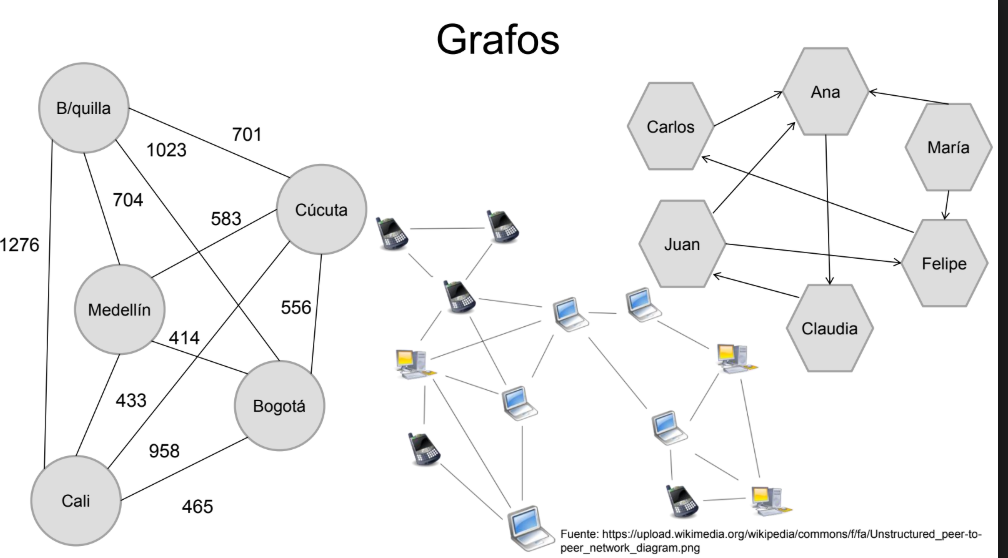

## Ejercicio 1



In [ ]:
from collections import defaultdict, deque

def calcular_numeros_paulina(invitados, bailes):
    # Crear grafo usando diccionario de adyacencia
    grafo = defaultdict(list)
    for a, b in bailes:
        grafo[a].append(b)
        grafo[b].append(a)
    
    # Inicializar números Paulina como infinito
    numeros_paulina = ['INF'] * invitados
    numeros_paulina[0] = 0  # Paulina es 0
    
    # BFS comenzando desde Paulina (nodo 0)
    visitados = set()
    cola = deque([(0, 0)])  # (nodo, distancia)
    
    while cola:
        nodo, distancia = cola.popleft()
        if nodo not in visitados:
            visitados.add(nodo)
            numeros_paulina[nodo] = distancia
            
            # Explorar vecinos
            for vecino in grafo[nodo]:
                if vecino not in visitados:
                    cola.append((vecino, distancia + 1))
    
    return numeros_paulina

def main():
    # Leer número de casos
    casos = int(input())
    
    for caso in range(1, casos + 1):
        # Leer invitados y bailes
        I, B = map(int, input().split(', '))
        
        # Leer parejas de baile
        parejas = []
        for _ in range(B):
            a, b = map(int, input().split())
            parejas.append((a, b))
        
        # Calcular números Paulina
        resultados = calcular_numeros_paulina(I, parejas)
        
        # Imprimir resultados
        print(f"fiesta {caso}:")
        for persona in range(1, I):  # Excluir a Paulina (0)
            print(f"{persona} {resultados[persona]}")
        
        # Línea en blanco entre casos, excepto después del último
        if caso < casos:
            print()


main()

## Ejercicio 2

In [1]:
from collections import defaultdict, deque

def build_graph(P, friend_lists):
    """Build adjacency list representation of the friendship graph"""
    graph = defaultdict(list)
    for person in range(P):
        friends = friend_lists[person]
        if friends[0] != -1:  # Check if person has friends
            for friend in friends:
                graph[person].append(friend)
    return graph

def find_max_gossip_spread(graph, start, P):
    """
    Find the day with maximum number of new people hearing the gossip
    Returns (max_day, max_spread)
    """
    if not graph[start]:  # If source has no friends
        return 0
    
    # Track visited people and when they heard the gossip
    heard_on_day = [-1] * P
    heard_on_day[start] = 0
    
    # Use BFS to simulate gossip spread
    queue = deque([(start, 0)])  # (person, day)
    daily_count = defaultdict(int)  # Count new listeners per day
    
    while queue:
        person, day = queue.popleft()
        
        for friend in graph[person]:
            if heard_on_day[friend] == -1:  # Friend hasn't heard gossip yet
                heard_on_day[friend] = day + 1
                daily_count[day + 1] += 1
                queue.append((friend, day + 1))
    
    if not daily_count:  # No one new heard the gossip
        return 0
    
    # Find day with maximum spread
    max_spread = max(daily_count.values())
    max_day = min(day for day, count in daily_count.items() 
                  if count == max_spread)
    
    return max_day, max_spread

def main():
    # Read number of people
    P = int(input())
    
    # Read friend lists
    friend_lists = []
    for _ in range(P):
        friends = list(map(int, input().split()))
        friend_lists.append(friends)
    
    # Build friendship graph
    graph = build_graph(P, friend_lists)
    
    # Read test cases
    test_cases = list(map(int, input().split(', ')))
    
    # Process each test case
    for start_person in test_cases:
        result = find_max_gossip_spread(graph, start_person, P)
        if isinstance(result, tuple):
            print(f"{result[0]} {result[1]}")
        else:
            print(0)


main()

ValueError: invalid literal for int() with base 10: ''

## Ejercicio 3

In [ ]:

class UnionFind:
    def __init__(self):
        # Dictionary to store parent relationships
        self.parent = {}
        # Dictionary to store size of each set
        self.size = {}
    
    def find(self, x):
        # Create new set if x doesn't exist
        if x not in self.parent:
            self.parent[x] = x
            self.size[x] = 1
            return x
        
        # Path compression: make each node point directly to root
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]
    
    def union(self, x, y):
        # Find roots of sets
        root_x = self.find(x)
        root_y = self.find(y)
        
        # If already in same set, do nothing
        if root_x == root_y:
            return
        
        # Union by size: attach smaller tree under root of larger tree
        if self.size[root_x] < self.size[root_y]:
            root_x, root_y = root_y, root_x
            
        self.parent[root_y] = root_x
        self.size[root_x] += self.size[root_y]
    
    def get_families_info(self):
        # Get unique roots (families) and maximum family size
        families = set()
        max_size = 0
        
        for person in self.parent:
            root = self.find(person)
            families.add(root)
            max_size = max(max_size, self.size[root])
        
        return len(families), max_size

def solve_case():
    # Read number of relationships
    R = int(input())
    
    # Create UnionFind structure
    uf = UnionFind()
    
    # Process each relationship
    for _ in range(R):
        x, y = map(int, input().split())
        uf.union(x, y)
    
    # Get and return result
    return uf.get_families_info()

def main():
    # Read number of test cases
    C = int(input())
    
    # Process each test case
    for _ in range(C):
        num_families, max_size = solve_case()
        print(f"{num_families} {max_size}")


main()



## Ejercicio 4

In [ ]:
def is_bipartite(graph, N):
    """
    Determina si un grafo es bipartito usando coloreo con DFS
    - color[i] = -1: nodo no visitado
    - color[i] = 0: primer color
    - color[i] = 1: segundo color
    """
    color = [-1] * (N + 1)  # +1 porque los nodos empiezan en 1
    
    def dfs(node, current_color):
        color[node] = current_color
        
        for neighbor in graph[node]:
            if color[neighbor] == -1:
                # Colorear vecino con color opuesto
                if not dfs(neighbor, 1 - current_color):
                    return False
            elif color[neighbor] == current_color:
                # Si el vecino tiene el mismo color, no es bipartito
                return False
        return True
    
    # Procesar cada componente conexa
    for node in range(1, N + 1):
        if color[node] == -1:
            if not dfs(node, 0):
                return False
    return True

def main():
    # Leer número de casos
    C = int(input())
    
    for _ in range(C):
        # Leer N (nodos) y M (aristas)
        N, M = map(int, input().split())
        
        # Crear grafo como lista de adyacencia
        graph = [[] for _ in range(N + 1)]
        
        # Leer aristas
        for _ in range(M):
            u, v = map(int, input().split(', '))
            # Grafo no dirigido
            graph[u].append(v)
            graph[v].append(u)
        
        # Verificar si es bipartito
        result = "bipartito" if is_bipartite(graph, N) else "no bipartito"
        print(result)


main()

## Ejercicio 5

In [ ]:
def find_largest_deforested_area(grid, A, B):
    """
    Encuentra el área deforestada contigua más grande usando DFS
    Args:
        grid (List[List[str]]): Matriz del mapa
        A (int): Número de filas
        B (int): Número de columnas
    Returns:
        int: Tamaño del área deforestada más grande
    """
    def dfs(row, col):
        # Si está fuera de límites o no es área deforestada, retornar 0
        if (row < 0 or row >= A or col < 0 or col >= B or 
            grid[row][col] != 'X' or visited[row][col]):
            return 0
            
        visited[row][col] = True
        area = 1  # Contamos la celda actual
        
        # Explorar las 4 direcciones (arriba, abajo, izquierda, derecha)
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        for dr, dc in directions:
            area += dfs(row + dr, col + dc)
            
        return area
    
    visited = [[False] * B for _ in range(A)]
    max_area = 0
    
    # Buscar en toda la matriz
    for i in range(A):
        for j in range(B):
            if grid[i][j] == 'X' and not visited[i][j]:
                max_area = max(max_area, dfs(i, j))
                
    return max_area

def main():
    # Leer número de casos
    C = int(input())
    
    # Procesar cada caso
    for _ in range(C):
        # Leer dimensiones
        A, B = map(int, input().split())
        
        # Leer mapa
        grid = []
        for _ in range(A):
            row = list(input().strip())
            grid.append(row)
        
        # Encontrar y mostrar resultado
        result = find_largest_deforested_area(grid, A, B)
        print(result)


main()

## Ejercicio 6

In [ ]:
from collections import deque

def convert_position(cell):
    """
    Convierte una posición de ajedrez (ej: 'A1') a coordenadas (x, y)
    """
    col = ord(cell[0]) - ord('A')  # A->0, B->1, ..., H->7
    row = int(cell[1]) - 1         # 1->0, 2->1, ..., 8->7
    return (row, col)

def is_valid(x, y):
    """
    Verifica si una posición está dentro del tablero
    """
    return 0 <= x < 8 and 0 <= y < 8

def min_knight_moves(start, end):
    """
    Encuentra la cantidad mínima de movimientos del caballo entre dos posiciones
    usando BFS
    """
    # Si inicio y fin son iguales
    if start == end:
        return 0
        
    # Convertir posiciones a coordenadas
    start = convert_position(start)
    end = convert_position(end)
    
    # Movimientos posibles del caballo
    moves = [
        (-2, -1), (-2, 1), (-1, -2), (-1, 2),
        (1, -2), (1, 2), (2, -1), (2, 1)
    ]
    
    # Cola para BFS y set para posiciones visitadas
    queue = deque([(start[0], start[1], 0)])  # (x, y, moves)
    visited = {start}
    
    # BFS
    while queue:
        x, y, dist = queue.popleft()
        
        # Probar todos los movimientos posibles
        for dx, dy in moves:
            new_x, new_y = x + dx, y + dy
            
            # Si llegamos al destino
            if (new_x, new_y) == end:
                return dist + 1
                
            # Si es válido y no visitado
            if is_valid(new_x, new_y) and (new_x, new_y) not in visited:
                visited.add((new_x, new_y))
                queue.append((new_x, new_y, dist + 1))
    
    return -1  # No debería llegar aquí en un tablero de ajedrez normal

def main():
    # Leer número de casos
    C = int(input())
    
    # Procesar cada caso
    for _ in range(C):
        # Leer posiciones de inicio y fin
        start, end = input().split()
        
        # Encontrar y mostrar resultado
        result = min_knight_moves(start, end)
        print(result)


main()